# Azure DALL·E image generation example
This notebook shows how to generate images with the Azure OpenAI service.


## Installation
Install the Azure Open AI SDK using the below command.

In [2]:
#r "nuget: Azure.AI.OpenAI, 1.0.0-beta.14"

Installed Packages Azure.AI.OpenAI, 1.0.0-beta.14

In [ ]:
#r "nuget:Microsoft.DotNet.Interactive.AIUtilities, 1.0.0-beta.24129.1"

using Microsoft.DotNet.Interactive;
using Microsoft.DotNet.Interactive.AIUtilities;

## Run this cell, it will prompt you for the apiKey, endPoint, and imageGeneration deployment name

In [4]:
var azureOpenAIKey = await Kernel.GetPasswordAsync("Provide your OPEN_AI_KEY");

// Your endpoint should look like the following https://YOUR_OPEN_AI_RESOURCE_NAME.openai.azure.com/
var azureOpenAIEndpoint = await Kernel.GetInputAsync("Provide the OPEN_AI_ENDPOINT");

var imageGenerationDeploymentName = await Kernel.GetInputAsync("Provide the imageGeneration deployment name");

### Import namesapaces and create an instance of `OpenAiClient` using the `azureOpenAIEndpoint` and the `azureOpenAIKey`

In [5]:
using Azure;
using Azure.AI.OpenAI;

In [6]:
OpenAIClient client = new (new Uri(azureOpenAIEndpoint), new AzureKeyCredential(azureOpenAIKey.GetClearTextPassword()));

Import [SkiaSharp](https://github.com/mono/SkiaSharp) to display images

In [7]:
#r "nuget: SkiaSharp, 2.88.6"

Installed Packages skiasharp, 2.88.6

The following code is a function that fetches an image from a given URL and draws it onto a canvas using the SkiaSharp library. SkiaSharp is a cross-platform 2D graphics API for .NET platforms based on Google's Skia Graphics Library. It provides a comprehensive 2D API that can be used across mobile, server, and desktop models to render images.

The function takes three parameters: a `string` representing the URL of the image, and two `int` values representing the width and height of the image.

Inside the function, an `SKImageInfo` object is created with the provided width and height. This object holds information about the image. An `SKSurface` object is then created using the `SKImageInfo` object. This surface will be used to draw the image.

An `HttpClient` object is created to send HTTP requests and receive HTTP responses from the image URL. The `GetStreamAsync` method is used to send a GET request to the specified Uri and return the response body as a stream in an asynchronous operation.

The image data from the stream is copied into a `MemoryStream` object. The `MemoryStream` object is then set back to the beginning using the `Seek` method. The image data is decoded into an `SKBitmap` object using the `SKBitmap.Decode` method.

The bitmap is then drawn onto the canvas at the coordinates (0,0) using the `DrawBitmap` method. The surface is then drawn onto the canvas at the coordinates (0,0) using the `Draw` method.

Finally, the method returns the `SKSurface` object, which now contains the drawn image.

In [8]:
using SkiaSharp;
using System.Net.Http;
using System.IO;

public static async Task<SKSurface> ShowImage(string url, int width, int height)
{
    SKImageInfo info = new SKImageInfo(width, height);
    SKSurface surface = SKSurface.Create(info);
    SKCanvas canvas = surface.Canvas;
    canvas.Clear(SKColors.White);
    var httpClient = new HttpClient();
    using (Stream stream = await httpClient.GetStreamAsync(url))
    using (MemoryStream memStream = new MemoryStream())
    {
        await stream.CopyToAsync(memStream);
        memStream.Seek(0, SeekOrigin.Begin);
        SKBitmap webBitmap = SKBitmap.Decode(memStream);
        canvas.DrawBitmap(webBitmap, 0, 0, null);
        surface.Draw(canvas, 0, 0, null);
    };
    return surface;
}

## Generations
With setup and authentication complete, you can now generate images on the Azure OpenAI service and retrieve them from the returned URLs.

### 1. Generate the images
The first step in this process is to actually generate the images:

In [9]:
var imageGenerations = await client.GetImageGenerationsAsync(
                new ImageGenerationOptions()
                {
                    Prompt = "A cyberpunk monkey hacker dreaming of a beautiful bunch of bananas, digital art",
                    Size = ImageSize.Size1024x1024,
                    DeploymentName = imageGenerationDeploymentName,
                });
        

### .2 Display
create the image using the response and `SkiaSharp` and display it


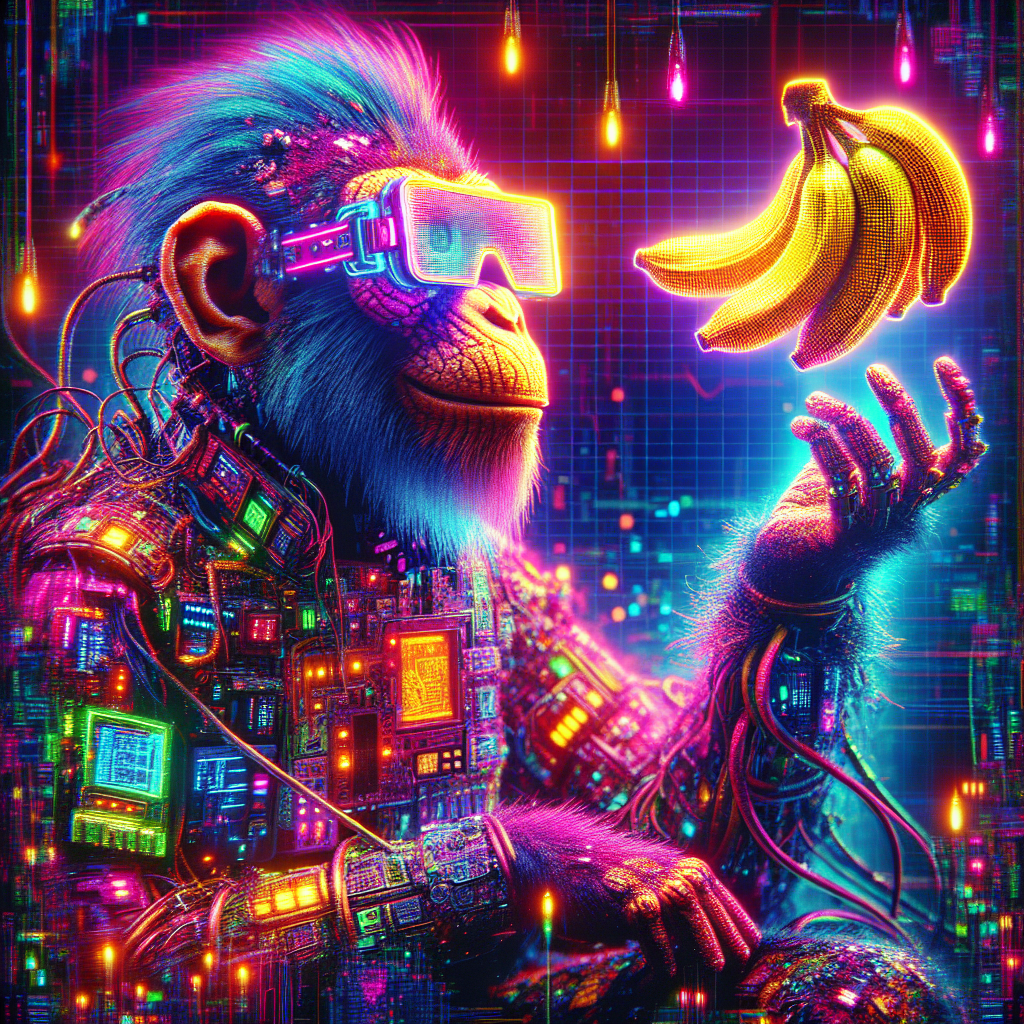

In [10]:
var imageUri = imageGenerations.Value.Data[0].Url;
var surface = await ShowImage(imageUri.ToString(), 1024, 1024);
surface.Display();